# Data
The data consists of fluorescence spectra readings from six different species of bacteria: Bacillus cereus, Listeria monocytogenes, Staphylococcus aureus, Salmonella enterica, Escherichia coli, and Pseudomonas aureginosa.
For each bacteria sample there are spectra readings for about 1043 different wavelengths of light and the three growth phases: lag, log, and stat (stationary). This means that for each bacteria sample there are 3 * 1304 data points. Furthermore, the spectra readings are generated with two different integration times (time spent gathering the spectra reading), 16ms and 32ms.

There are some large numbers in the dataset (some spectra readings exceed 25,000). This poses a problem when training SVM models that use the linear kernel as the linear kernel is very slow for large values. For example, a SVM using the rbf kernel would take less than ~0.1 second to train while a SVM using could take up to ~16 minutes to train. To mitigate this effect I scaled the data into the interval [0.0, 1.0]. However, scaling is done 'globally' as opposed to scaling each feature individually as is done in the sklearn scaling libraries. This retains the relative scale between features. It is important to keep the relative scaling between features because technically all the features in this dataset are readings of the same feature. Ignoring relative scale and scaling on a per-feature basis worsens classification peformance.

The labels (or targets) are set to be the 'gram-ness' of the given bacteria sample, i.e. whether or not the given bacteria would test positive in the [gram stain test](https://en.wikipedia.org/wiki/Gram_stain). These groupings for the bacteria in the dataset are:

- Gram positive
    - Bc - Bacillus cereus 
    - lm - Listeria monocytogenes
    - sa - Staphylococcus aureus 

- Gram negative
    - se - Salmonella enterica
    - ec - Escherichia coli
    - pa - Pseudomonas aureginosa
    
Setting the labels to the gram-ness seems to alleviate the class imbalance problem encountered when classifying bacteria species.

# Models
The classifiers used in the following experiments are:
1. Naive Bayes
2. SVM
3. RandomForest with Decision Stumps
4. RandomForest with Decision Trees
5. AdaBoost with Decision Stumps
6. AdaBoost with Decision Trees.

Additionally, the parameters 'C', 'gamma', and 'kernel' are optimised for the SVM model via grid search. The score given for the SVM model is the model initialised with the best parameters found in this parameter search.
The decision stumps/trees used with AdaBoost and RandomForest are tested with a max tree depth of 1 (for decision stumps) and 3. RandomForest models are tested with 512 classifiers and AdaBoost with 256 classifiers.

# Methodology
In the code below an experiment refers to a sequence of tests which evaluate the performance of various models. An experiment is run for the entire dataset and again for each subset of the dataset, where a subset is simply the data from a single growth phase. In each experiment I run the same series of tests twice, once for each integration time. 

Each model is evaluated using both the original, untransformed data and a PCA transformed version of the data. Models are evaluated using repeated stratified k-fold cross validation where the data is split into three folds (n_splits) 20 times (n_repeats). The scores given for both the untransformed data and the PCA data consist of the mean score over all the 60 indvidual folds +/- two standard deviations.

The random state is set to the same value across different modules (e.g. train_test_split, RandomForest initialisation) to ensure results can be reproduced consistently.

At the end of the notebook I have added brief summaries of the results with a table with the top three configurations (in terms of both data and models) and a bar chart comparing classification scores across each configuration. The black lines on the bars in the bar chart indicate the +/- two standard deviation ranges.

The code for these experiments can be found under the file `experiment.py`.

# Brief Summary of Results
Overall, none of models are able to produce good results, with the best classification accuracy being ~57%. 
Since, in the case of using all growth phase data, there are about 12 samples from the majority class out of a total of 39 samples, the best score a classifier could get by consistently guessing the majority class would be around 30%. So while 57% is quite a bit better, it is still too unreliable for practical use. 

In [1]:
from experiment import GramnessExperiment

In [2]:
experiment_lag = GramnessExperiment('lag')
experiment_lag.run()

################################################################################
Running tests for 16ms integration time.
################################################################################
**************************
Running Naive Bayes tests.
**************************
Accuracy: 0.69 (+/- 0.20)
PCA Accuracy: 0.66 (+/- 0.21)
Elapsed time: 0.60s.
******************
Running SVM tests.
******************
Fitting 60 folds for each of 220 candidates, totalling 13200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 377 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 6677 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 13200 out of 13200 | elapsed:   23.3s finished


Best grid search score was 0.89 with the following settings: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 0.91 (+/- 0.13)
PCA Accuracy: 0.89 (+/- 0.13)
Elapsed time: 23.79s.
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 1.
**************************************************************************
Accuracy: 0.76 (+/- 0.20)
PCA Accuracy: 0.74 (+/- 0.16)
Elapsed time: 54.98s.
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 3.
**************************************************************************
Accuracy: 0.75 (+/- 0.21)
PCA Accuracy: 0.74 (+/- 0.19)
Elapsed time: 56.88s.
**********************************************************************
Running AdaBoost tests using 256 Decision Trees with a max depth of 1.
**********************************************************************
A

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 2340 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 13200 out of 13200 | elapsed:   12.5s finished


Best grid search score was 0.92 with the following settings: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 0.92 (+/- 0.13)
PCA Accuracy: 0.92 (+/- 0.13)
Elapsed time: 12.88s.
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 1.
**************************************************************************
Accuracy: 0.75 (+/- 0.18)
PCA Accuracy: 0.69 (+/- 0.15)
Elapsed time: 54.65s.
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 3.
**************************************************************************
Accuracy: 0.75 (+/- 0.17)
PCA Accuracy: 0.71 (+/- 0.17)
Elapsed time: 57.55s.
**********************************************************************
Running AdaBoost tests using 256 Decision Trees with a max depth of 1.
**********************************************************************

In [3]:
experiment_log = GramnessExperiment('log')
experiment_log.run()

################################################################################
Running tests for 16ms integration time.
################################################################################
**************************
Running Naive Bayes tests.
**************************
Accuracy: 0.97 (+/- 0.07)
PCA Accuracy: 0.77 (+/- 0.21)
Elapsed time: 0.48s.
******************
Running SVM tests.
******************
Fitting 60 folds for each of 220 candidates, totalling 13200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 2400 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 13200 out of 13200 | elapsed:   13.3s finished


Best grid search score was 0.98 with the following settings: {'C': 0.01, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 0.98 (+/- 0.07)
PCA Accuracy: 0.98 (+/- 0.07)
Elapsed time: 13.72s.
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 1.
**************************************************************************
Accuracy: 0.98 (+/- 0.07)
PCA Accuracy: 0.90 (+/- 0.15)
Elapsed time: 55.57s.
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 3.
**************************************************************************
Accuracy: 0.98 (+/- 0.07)
PCA Accuracy: 0.94 (+/- 0.11)
Elapsed time: 56.55s.
**********************************************************************
Running AdaBoost tests using 256 Decision Trees with a max depth of 1.
*********************************************************************

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 4822 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 13200 out of 13200 | elapsed:   12.6s finished


Best grid search score was 0.98 with the following settings: {'C': 0.01, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 0.98 (+/- 0.07)
PCA Accuracy: 0.98 (+/- 0.07)
Elapsed time: 12.98s.
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 1.
**************************************************************************
Accuracy: 0.98 (+/- 0.07)
PCA Accuracy: 0.88 (+/- 0.17)
Elapsed time: 55.16s.
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 3.
**************************************************************************
Accuracy: 0.98 (+/- 0.07)
PCA Accuracy: 0.93 (+/- 0.13)
Elapsed time: 55.14s.
**********************************************************************
Running AdaBoost tests using 256 Decision Trees with a max depth of 1.
*********************************************************************

In [4]:
experiment_stat = GramnessExperiment('stat')
experiment_stat.run()

################################################################################
Running tests for 16ms integration time.
################################################################################
**************************
Running Naive Bayes tests.
**************************
Accuracy: 0.91 (+/- 0.13)
PCA Accuracy: 0.74 (+/- 0.24)
Elapsed time: 0.43s.
******************
Running SVM tests.
******************
Fitting 60 folds for each of 220 candidates, totalling 13200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 2724 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 13200 out of 13200 | elapsed:   11.8s finished


Best grid search score was 0.93 with the following settings: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy: 0.93 (+/- 0.11)
PCA Accuracy: 0.93 (+/- 0.11)
Elapsed time: 12.21s.
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 1.
**************************************************************************
Accuracy: 0.92 (+/- 0.12)
PCA Accuracy: 0.81 (+/- 0.16)
Elapsed time: 55.41s.
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 3.
**************************************************************************
Accuracy: 0.92 (+/- 0.12)
PCA Accuracy: 0.85 (+/- 0.15)
Elapsed time: 55.56s.
**********************************************************************
Running AdaBoost tests using 256 Decision Trees with a max depth of 1.
**********************************************************************


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 4348 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 13200 out of 13200 | elapsed:   12.4s finished


Best grid search score was 0.93 with the following settings: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy: 0.93 (+/- 0.10)
PCA Accuracy: 0.93 (+/- 0.10)
Elapsed time: 12.84s.
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 1.
**************************************************************************
Accuracy: 0.91 (+/- 0.12)
PCA Accuracy: 0.87 (+/- 0.15)
Elapsed time: 54.91s.
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 3.
**************************************************************************
Accuracy: 0.91 (+/- 0.12)
PCA Accuracy: 0.89 (+/- 0.13)
Elapsed time: 56.76s.
**********************************************************************
Running AdaBoost tests using 256 Decision Trees with a max depth of 1.
**********************************************************************


In [5]:
experiment_all = GramnessExperiment('all')
experiment_all.run()

################################################################################
Running tests for 16ms integration time.
################################################################################
**************************
Running Naive Bayes tests.
**************************
Accuracy: 0.95 (+/- 0.10)
PCA Accuracy: 0.75 (+/- 0.25)
Elapsed time: 0.62s.
******************
Running SVM tests.
******************
Fitting 60 folds for each of 220 candidates, totalling 13200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 2756 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 13200 out of 13200 | elapsed:   13.1s finished


Best grid search score was 0.97 with the following settings: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy: 0.97 (+/- 0.07)
PCA Accuracy: 0.97 (+/- 0.07)
Elapsed time: 13.72s.
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 1.
**************************************************************************
Accuracy: 0.93 (+/- 0.13)
PCA Accuracy: 0.85 (+/- 0.15)
Elapsed time: 56.13s.
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 3.
**************************************************************************
Accuracy: 0.93 (+/- 0.13)
PCA Accuracy: 0.90 (+/- 0.12)
Elapsed time: 56.91s.
**********************************************************************
Running AdaBoost tests using 256 Decision Trees with a max depth of 1.
**********************************************************************


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 2836 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 13200 out of 13200 | elapsed:   11.9s finished


Best grid search score was 0.97 with the following settings: {'C': 0.001, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 0.97 (+/- 0.07)
PCA Accuracy: 0.97 (+/- 0.07)
Elapsed time: 12.40s.
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 1.
**************************************************************************
Accuracy: 0.92 (+/- 0.13)
PCA Accuracy: 0.78 (+/- 0.17)
Elapsed time: 54.67s.
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 3.
**************************************************************************
Accuracy: 0.93 (+/- 0.13)
PCA Accuracy: 0.93 (+/- 0.13)
Elapsed time: 56.10s.
**********************************************************************
Running AdaBoost tests using 256 Decision Trees with a max depth of 1.
********************************************************************

Results for Tests Run on Lag Growth Phase Data
Top Three Configurations:
   integration_time classifier   dataset mean_score score_std
0             32ms        svm       pca       0.92  0.070.07
1             32ms        svm  original       0.92  0.060.06
2             16ms        svm  original       0.91  0.060.06


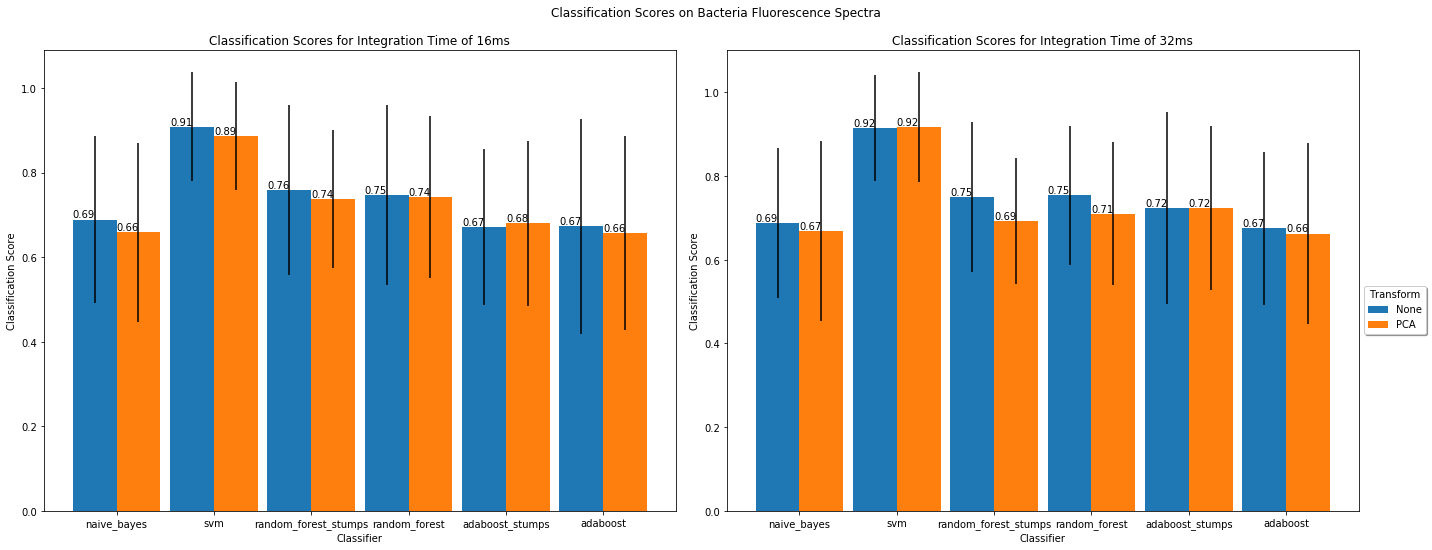

In [6]:
print('Results for Tests Run on Lag Growth Phase Data')

print('Top Three Configurations:\n', experiment_lag.top_three())
experiment_lag.plot_results();

Results for Tests Run on Log Growth Phase Data
Top Three Configurations:
   integration_time            classifier   dataset mean_score score_std
0             16ms                   svm  original       0.98  0.030.03
1             16ms                   svm       pca       0.98  0.030.03
2             16ms  random_forest_stumps  original       0.98  0.030.03


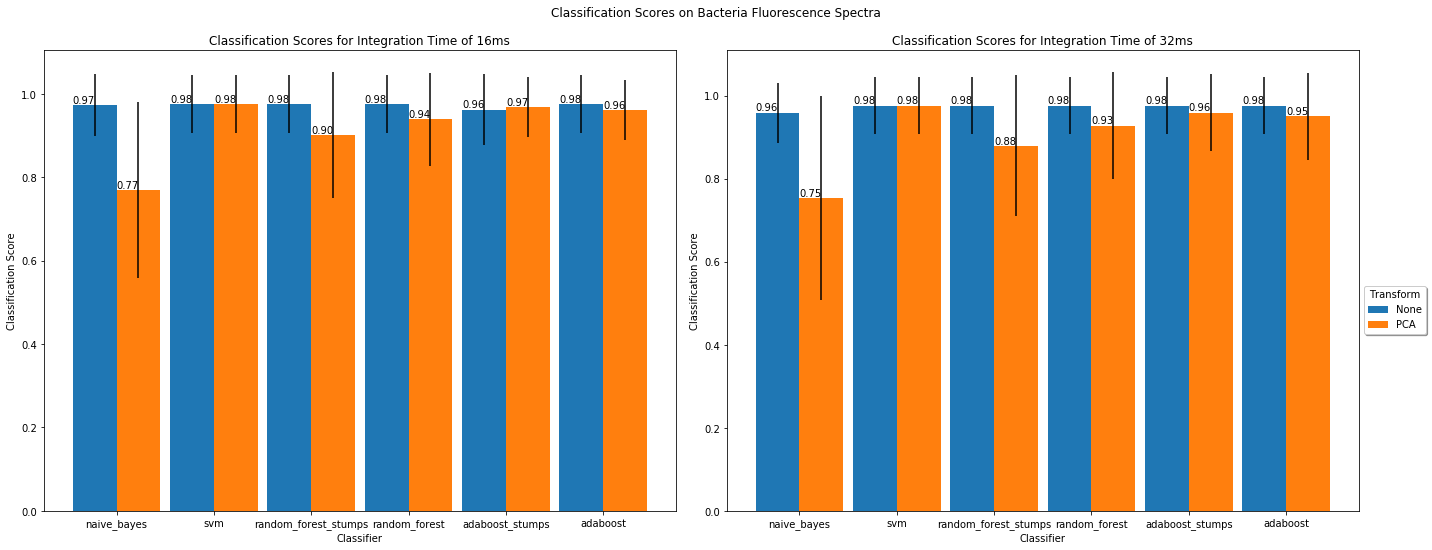

In [7]:
print('Results for Tests Run on Log Growth Phase Data')

print('Top Three Configurations:\n', experiment_log.top_three())
experiment_log.plot_results();

Results for Tests Run on Stationary Growth Phase Data
Top Three Configurations:
   integration_time classifier   dataset mean_score score_std
0             16ms        svm  original       0.93  0.060.06
1             16ms        svm       pca       0.93  0.060.06
2             32ms        svm  original       0.93  0.050.05


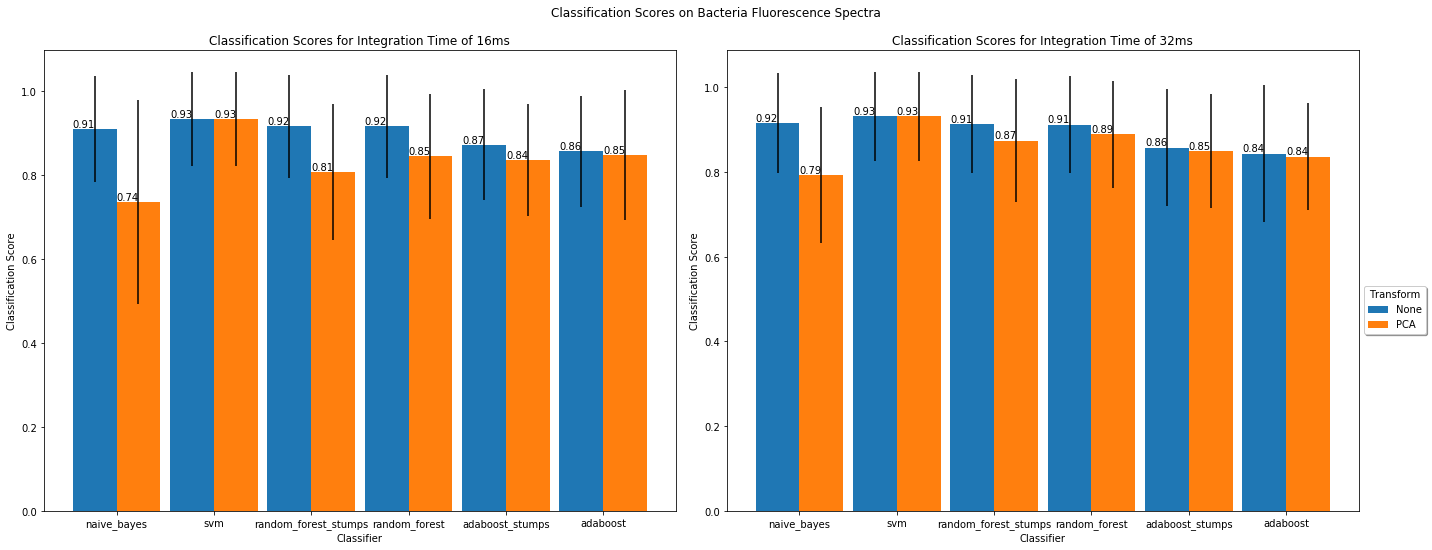

In [8]:
print('Results for Tests Run on Stationary Growth Phase Data')

print('Top Three Configurations:\n', experiment_stat.top_three())
experiment_stat.plot_results();

Results for Tests Run on All Growth Phase Data
Top Three Configurations:
   integration_time classifier   dataset mean_score score_std
0             16ms        svm  original       0.97  0.040.04
1             16ms        svm       pca       0.97  0.040.04
2             32ms        svm  original       0.97  0.040.04


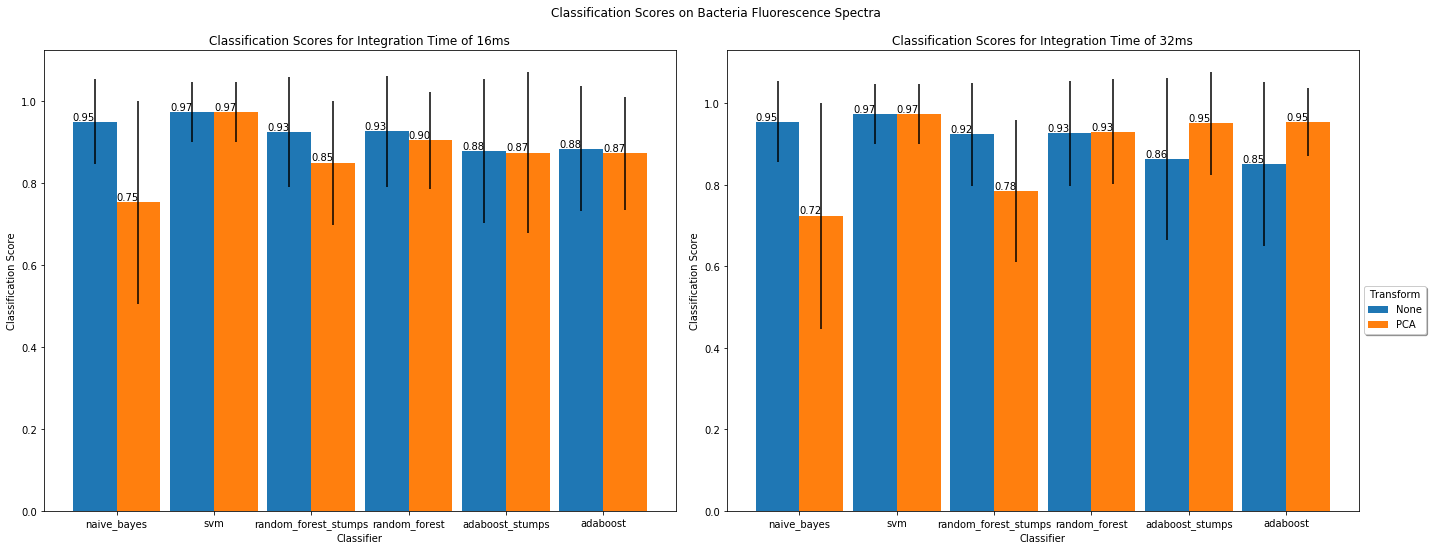

In [9]:
print('Results for Tests Run on All Growth Phase Data')

print('Top Three Configurations:\n', experiment_all.top_three())
experiment_all.plot_results();